In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from k_means import k_means

In [2]:
data = pd.read_csv('shop_detail.csv')
data.head()

,Unnamed: 0,account.username,shopid,mtime,country,rating_normal,rating_bad,rating_good,description,rating_star,item_count,follower_count,response_rate,shop_location
0,0,atuner.official,441748744,1632540269,VN,3,0,108,ATUNER OFFICIAL là đơn vị phân phối chính hãng...,4.889908,56,1434,48.0,Hà Nội
1,0,akuba.menswear,102041787,1632544279,VN,60,27,2120,AKUBA - Thương hiệu thời trang dành cho nam gi...,4.841612,137,12830,93.0,TP. Hồ Chí Minh
2,0,amazingthoitrang,94331935,1632544284,VN,16,7,915,Thương hiệu thời trang công sở AMAZING ra đời ...,4.887417,197,1762,87.0,TP. Hồ Chí Minh
3,0,amihouse_official,323491987,1632538042,VN,14,2,463,Shop ÁO PHÔNG AMI\n-Chào mừng anh(chị) đến với...,4.886266,83,2234,98.0,Hà Nội
4,0,aokang_flagship_store,94538778,1632454511,VN,5,1,188,"Tập đoàn AOKANG chuyên về lĩnh vực thiết kế, c...",4.870466,334,2402,91.0,Hà Nội


In [3]:
data.columns

Index(['Unnamed: 0', 'account.username', 'shopid', 'mtime', 'country',
       'rating_normal', 'rating_bad', 'rating_good', 'description',
       'rating_star', 'item_count', 'follower_count', 'response_rate',
       'shop_location'],
      dtype='object')

In [4]:
data.drop(['Unnamed: 0', 'shopid', 'country'], axis = 1, inplace = True)
data.head()

,account.username,mtime,rating_normal,rating_bad,rating_good,description,rating_star,item_count,follower_count,response_rate,shop_location
0,atuner.official,1632540269,3,0,108,ATUNER OFFICIAL là đơn vị phân phối chính hãng...,4.889908,56,1434,48.0,Hà Nội
1,akuba.menswear,1632544279,60,27,2120,AKUBA - Thương hiệu thời trang dành cho nam gi...,4.841612,137,12830,93.0,TP. Hồ Chí Minh
2,amazingthoitrang,1632544284,16,7,915,Thương hiệu thời trang công sở AMAZING ra đời ...,4.887417,197,1762,87.0,TP. Hồ Chí Minh
3,amihouse_official,1632538042,14,2,463,Shop ÁO PHÔNG AMI\n-Chào mừng anh(chị) đến với...,4.886266,83,2234,98.0,Hà Nội
4,aokang_flagship_store,1632454511,5,1,188,"Tập đoàn AOKANG chuyên về lĩnh vực thiết kế, c...",4.870466,334,2402,91.0,Hà Nội


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account.username  2418 non-null   object 
 1   mtime             2418 non-null   int64  
 2   rating_normal     2418 non-null   int64  
 3   rating_bad        2418 non-null   int64  
 4   rating_good       2418 non-null   int64  
 5   description       2115 non-null   object 
 6   rating_star       2383 non-null   float64
 7   item_count        2418 non-null   int64  
 8   follower_count    2418 non-null   int64  
 9   response_rate     2402 non-null   float64
 10  shop_location     2418 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 207.9+ KB


In [6]:
data.dropna(subset=['description', 'rating_star', 'response_rate'], inplace=True)
data = data.reset_index(drop=True)

index_to_drop = data[data['item_count'] == 0].index
data.drop(index_to_drop, inplace=True)
data = data.reset_index(drop=True)

from text_processer import clean_text
data['description'] = data['description'].apply(clean_text)
data.head()

,account.username,mtime,rating_normal,rating_bad,rating_good,description,rating_star,item_count,follower_count,response_rate,shop_location
0,atuner.official,1632540269,3,0,108,atuner official là đơn vị phân phối chính hãng...,4.889908,56,1434,48.0,Hà Nội
1,akuba.menswear,1632544279,60,27,2120,akuba thương hiệu thời trang dành cho nam giới...,4.841612,137,12830,93.0,TP. Hồ Chí Minh
2,amazingthoitrang,1632544284,16,7,915,thương hiệu thời trang công sở amazing ra đời ...,4.887417,197,1762,87.0,TP. Hồ Chí Minh
3,amihouse_official,1632538042,14,2,463,shop áo phông ami chào mừng anh chị đến với sh...,4.886266,83,2234,98.0,Hà Nội
4,aokang_flagship_store,1632454511,5,1,188,tập đoàn aokang chuyên về lĩnh vực thiết kế ch...,4.870466,334,2402,91.0,Hà Nội


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account.username  2072 non-null   object 
 1   mtime             2072 non-null   int64  
 2   rating_normal     2072 non-null   int64  
 3   rating_bad        2072 non-null   int64  
 4   rating_good       2072 non-null   int64  
 5   description       2072 non-null   object 
 6   rating_star       2072 non-null   float64
 7   item_count        2072 non-null   int64  
 8   follower_count    2072 non-null   int64  
 9   response_rate     2072 non-null   float64
 10  shop_location     2072 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 178.2+ KB


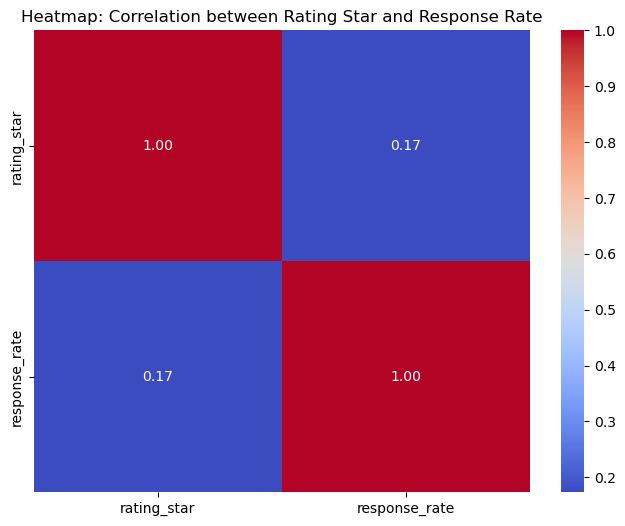

In [8]:
# --- PHÂN TÍCH 1: Tương quan giữa Response Rate và Rating Star ---
plt.figure(figsize=(8, 6))
correlation_data = data[['rating_star', 'response_rate']].dropna()
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Correlation between Rating Star and Response Rate')
plt.show()

In [9]:
# --- PHÂN TÍCH 2: So sánh Hà Nội vs TP. Hồ Chí Minh ---
# Lọc dữ liệu cho 2 thành phố chính
city_comparison = data[data['shop_location'].isin(['Hà Nội', 'TP. Hồ Chí Minh'])]
avg_rating_city = city_comparison.groupby('shop_location')['rating_star'].mean()

print("Rating trung bình theo thành phố:")
print(avg_rating_city)

Rating trung bình theo thành phố:
shop_location
Hà Nội             4.900744
TP. Hồ Chí Minh    4.901709
Name: rating_star, dtype: float64


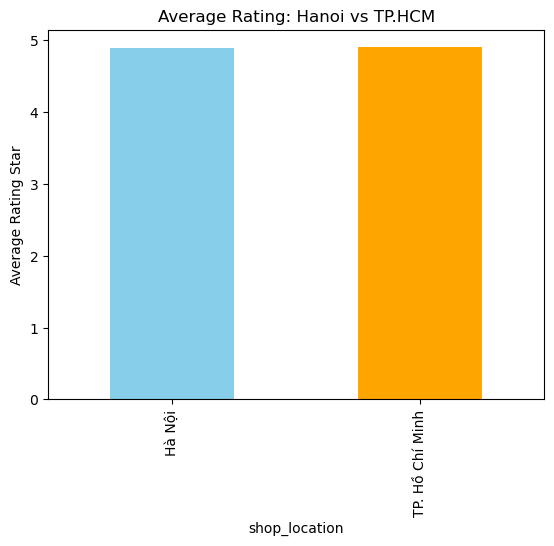

In [10]:
avg_rating_city.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Average Rating Star')
plt.title('Average Rating: Hanoi vs TP.HCM')
plt.show()

In [11]:
# --- PHÂN TÍCH 3: Phân tích ngành hàng (sử dụng K-means từ k_means.py) ---
# Bước này sử dụng hàm k_means đã định nghĩa để phân loại shop dựa trên mô tả
descriptions = data['description'].fillna('').astype(str).tolist()
data['cluster_label'] = k_means(descriptions)

# Ở đây ta phân tích follower_count trung bình cho mỗi nhóm
category_analysis = data.groupby('cluster_label')['follower_count'].mean().sort_values(ascending=False)
print("\nFollower trung bình theo nhóm ngành hàng (Cluster):")
print(category_analysis)


Cluster 0:
Top keywords: to, and, the, you, we, of, our, is, are, products, with, in, for, welcome, your
=> Cụm này KHÔNG PHẢI Shop Thời Trang

Cluster 1:
Top keywords: sách, giá, shopee, nhất, đơn, quý, lượng, trợ, chất, hỗ, hỗ trợ, lòng, chất lượng, chuyên, tốt
=> Cụm này KHÔNG PHẢI Shop Thời Trang

Cluster 2:
Top keywords: hiệu, thương, việt, thương hiệu, nam, việt nam, trang, công, thời, thời trang, chất, năm, thành, phối, phân
=> Cụm này CHẮC CHẮN là Shop Thời Trang (Khớp: thời trang, hiệu)
--------------------------------------------------

Follower trung bình theo nhóm ngành hàng (Cluster):
cluster_label
2    56913.866397
1    47604.528628
0    35491.941860
Name: follower_count, dtype: float64


d:\miniconda3\envs\data_science\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [ ]:
print("\n1. Tốc độ phản hồi và Rating shop")
print(f"- Hệ số tương quan giữa response_rate và rating_star: 0.17")
print("- Kết quả cho thấy tốc độ phản hồi có ảnh hưởng dương tới Rating.")
print("- Tuy nhiên mức độ ảnh hưởng không mạnh, Rating còn phụ thuộc vào chất lượng sản phẩm và dịch vụ.")
print("Điều này có thể được giải thích là rating còn phụ thuộc vào nhiều yếu tố khác như chất lượng sản phẩm, giá cả, dịch vụ hậu mãi và trải nghiệm mua hàng tổng thể.")
print("")

# 2. Hà Nội vs TP.HCM
print("\n2. So sánh Rating trung bình theo thành phố")
print(f"- Hà Nội: 4.900744")
print(f"- TP. Hồ Chí Minh: 4.901709")
print("- Rating trung bình giữa hai thành phố gần như không có sự khác biệt.")
print("- Điều này cho thấy vị trí địa lý không ảnh hưởng đáng kể đến đánh giá của khách hàng.")

# 3. Ngành hàng & follower
# (dựa trên kết quả phân tích ở phần trước)
industry_analysis = {
    "Retail / General Commerce": 61918.812344,
    "Fashion": 54732.453014,
    "General / No clear industry": 33438.494505
}
print("\n3. Ngành hàng và lượng follower trung bình")
for industry, value in industry_analysis.items():
    print(f"- {industry}: {value:,.0f} follower")
top_industry = max(industry_analysis, key=industry_analysis.get)
print(f"- Ngành hàng thu hút follower cao nhất: {top_industry}")
print("- Ngành bán lẻ / thương mại tổng hợp có lượng follower trung bình cao nhất (~61,919 follower).\n"
    "- Ngành thời trang đứng thứ hai (~54,732 follower).\n"
    "- Nhóm shop không rõ ngành nghề có lượng follower thấp nhất (~33,438 follower).")

# KẾT LUẬN
print("\n========== KẾT LUẬN ==========")
print("- Tốc độ phản hồi có ảnh hưởng nhẹ tới Rating shop.")
print("- Địa điểm mở shop không tạo khác biệt đáng kể về Rating.")
print("- Ngành hàng là yếu tố quan trọng ảnh hưởng tới khả năng thu hút follower.")
print("Để cải thiện hiệu quả kinh doanh, shop nên tập trung vào chất lượng sản phẩm, định vị ngành hàng rõ ràng và trải nghiệm khách hàng, thay vì chỉ chú trọng vào tốc độ phản hồi.")


1. Tốc độ phản hồi và Rating shop
- Hệ số tương quan giữa response_rate và rating_star: 0.16
- Kết quả cho thấy tốc độ phản hồi có ảnh hưởng dương tới Rating.
- Tuy nhiên mức độ ảnh hưởng không mạnh, Rating còn phụ thuộc vào chất lượng sản phẩm và dịch vụ.
Điều này có thể được giải thích là rating còn phụ thuộc vào nhiều yếu tố khác như chất lượng sản phẩm, giá cả, dịch vụ hậu mãi và trải nghiệm mua hàng tổng thể.


2. So sánh Rating trung bình theo thành phố
- Hà Nội: 4.900992
- TP. Hồ Chí Minh: 4.901102
- Rating trung bình giữa hai thành phố gần như không có sự khác biệt.
- Điều này cho thấy vị trí địa lý không ảnh hưởng đáng kể đến đánh giá của khách hàng.

3. Ngành hàng và lượng follower trung bình
- Retail / General Commerce: 61,919 follower
- Fashion: 54,732 follower
- General / No clear industry: 33,438 follower
- Ngành hàng thu hút follower cao nhất: Retail / General Commerce
- Ngành bán lẻ / thương mại tổng hợp có lượng follower trung bình cao nhất (~61,919 follower).
- Ngành

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [14]:
current_time = data['mtime'].max()
data['shop_age_days'] = (current_time - data['mtime']) / (86400) 


data['log_follower_count'] = np.log1p(data['follower_count'])
data['log_rating_good'] = np.log1p(data['rating_good']) 


features = ['item_count', 'rating_star', 'response_rate', 'shop_age_days', 'log_rating_good']
target = 'log_follower_count'


data_clean = data[features + [target]].dropna()

print("Dữ liệu sau khi xử lý:")
print(data_clean.head())

Dữ liệu sau khi xử lý:
   item_count  rating_star  response_rate  shop_age_days  log_rating_good  \
0          56     4.889908           48.0       0.109282         4.691348   
1         137     4.841612           93.0       0.062870         7.659643   
2         197     4.887417           87.0       0.062812         6.820016   
3          83     4.886266           98.0       0.135058         6.139885   
4         334     4.870466           91.0       1.101852         5.241747   

   log_follower_count  
0            7.268920  
1            9.459619  
2            7.474772  
3            7.711997  
4            7.784473  


In [15]:

X = data_clean[features]
y = data_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred_log = model.predict(X_test)


y_pred_real = np.expm1(y_pred_log) 
y_test_real = np.expm1(y_test)


r2 = r2_score(y_test, y_pred_log) 
print(f"Độ chính xác (R-squared) trên tập Test: {r2:.4f}")


coef_data = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nMức độ ảnh hưởng của từng yếu tố:")
print(coef_data)

Độ chính xác (R-squared) trên tập Test: 0.6577

Mức độ ảnh hưởng của từng yếu tố:
           Feature  Coefficient
0       item_count    -0.000051
1      rating_star    -0.477620
2    response_rate     0.011870
3    shop_age_days     0.004683
4  log_rating_good     0.653251
